In [65]:
#---Ensures the correct path in the parent folder---

# import os
# import sys

# sys.path.append(os.path.abspath(".."))

#---Importing requried libraries---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Defining the paths where the data, models etc are stored

data_path = "../data/exams.csv"

In [67]:
df = pd.read_csv(data_path)

In [68]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [69]:
print(f"Columns: {df.columns} \n")

Columns: Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object') 



In [70]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [71]:
categorial_columns_list = df.select_dtypes(include=["category", "object"]).columns.tolist()

# Seperating numerical columns

numerical_columns_list = df.drop(columns=categorial_columns_list).columns.to_list()

In [72]:
print(f"List of Categorial Columsn: {categorial_columns_list}\n")
print(f"List of Numerical Columns: {numerical_columns_list}")

List of Categorial Columsn: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

List of Numerical Columns: ['math score', 'reading score', 'writing score']


In [73]:
# Checking the values of categorial columns

for col in categorial_columns_list: 
    print(f"Values of column {df[col].value_counts()} \n")

Values of column gender
male      508
female    492
Name: count, dtype: int64 

Values of column race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64 

Values of column parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64 

Values of column lunch
standard        660
free/reduced    340
Name: count, dtype: int64 

Values of column test preparation course
none         656
completed    344
Name: count, dtype: int64 



In [74]:
df['test preparation course'].value_counts()

test preparation course
none         656
completed    344
Name: count, dtype: int64

In [75]:
# Converting the exam scores into a pass or fail column

avg_scores = (df['math score'] + df['reading score']  + df['writing score'])/ 3

df['result'] = avg_scores.apply(lambda x: 'pass' if x >= 45 else 'fail')



In [76]:
df['result'].value_counts()

result
pass    953
fail     47
Name: count, dtype: int64

In [77]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'result'],
      dtype='object')

In [78]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
0,female,group D,some college,standard,completed,59,70,78,pass
1,male,group D,associate's degree,standard,none,96,93,87,pass
2,female,group D,some college,free/reduced,none,57,76,77,pass
3,male,group B,some college,free/reduced,none,70,70,63,pass
4,female,group D,associate's degree,standard,none,83,85,86,pass
...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,pass
996,male,group C,some college,standard,none,80,66,66,pass
997,female,group A,high school,standard,completed,67,86,86,pass
998,male,group E,high school,standard,none,80,72,62,pass


In [79]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,result
0,female,group D,some college,standard,completed,59,70,78,pass
1,male,group D,associate's degree,standard,none,96,93,87,pass
2,female,group D,some college,free/reduced,none,57,76,77,pass
3,male,group B,some college,free/reduced,none,70,70,63,pass
4,female,group D,associate's degree,standard,none,83,85,86,pass


In [83]:
df['result'] = avg_scores.apply(lambda x: 'pass' if x >= 45 else 'fail')


In [86]:
df["result"] = df["result"].map({"pass": 1, "fail": 0})


In [87]:
df[["result"]].head()


,result
0,1
1,1
2,1
3,1
4,1


In [88]:
pass_rate = df.groupby("parental level of education")["result"].mean() * 100


In [89]:
df["result"].value_counts()


result
1    953
0     47
Name: count, dtype: int64

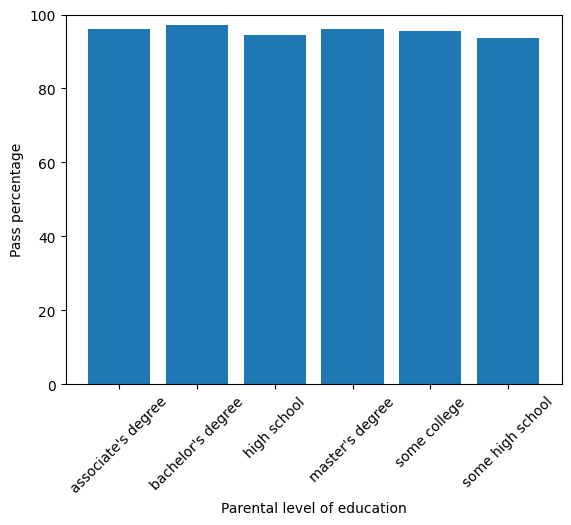

In [94]:
plt.bar(pass_rate.index, pass_rate.values)
plt.xlabel("Parental level of education")
plt.ylabel("Pass percentage")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()


In [ ]:
# Bachelors degree got more waitage than the others

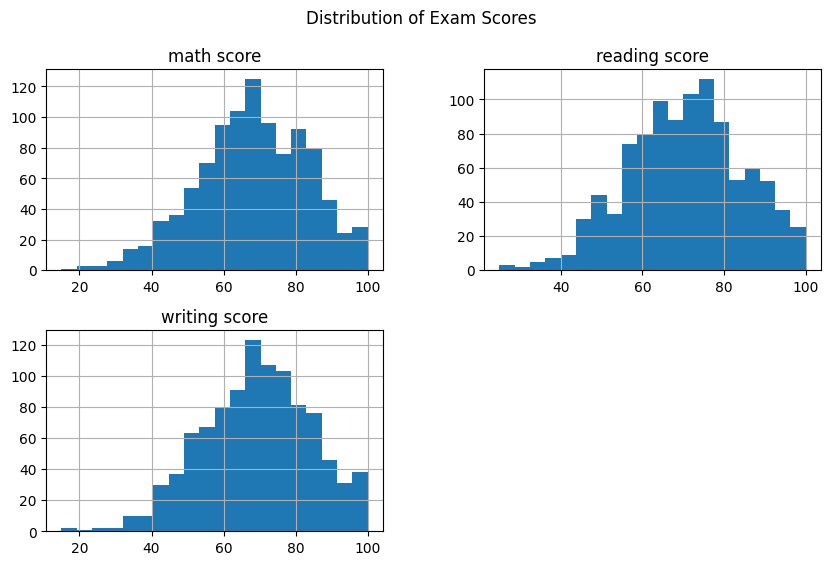

In [91]:
df[["math score", "reading score", "writing score"]].hist(
    bins=20, figsize=(10,6)
)
plt.suptitle("Distribution of Exam Scores")
plt.show()


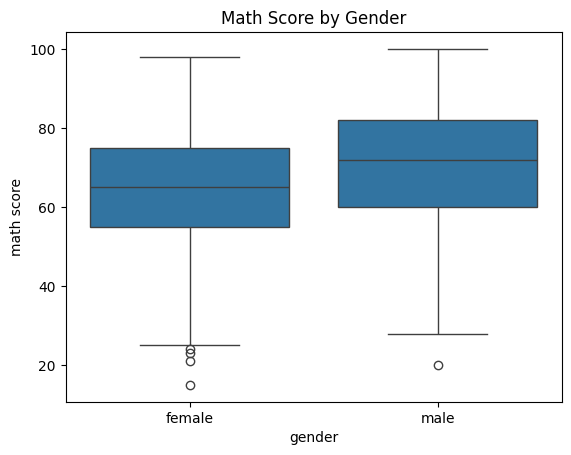

In [92]:
sns.boxplot(data=df, x="gender", y="math score")
plt.title("Math Score by Gender")
plt.show()


In [97]:
df["avg_score"] = df[["math score","reading score","writing score"]].mean(axis=1)


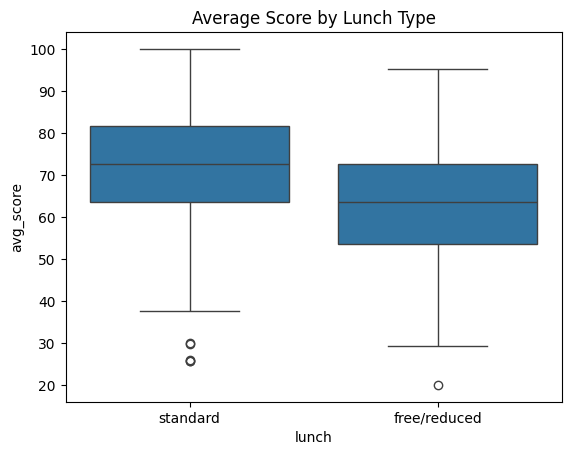

In [98]:
sns.boxplot(data=df, x="lunch", y="avg_score")
plt.title("Average Score by Lunch Type")
plt.show()


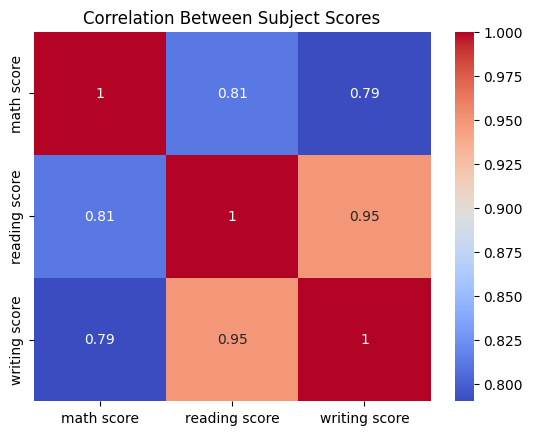

In [99]:
sns.heatmap(
    df[["math score","reading score","writing score"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Subject Scores")
plt.show()


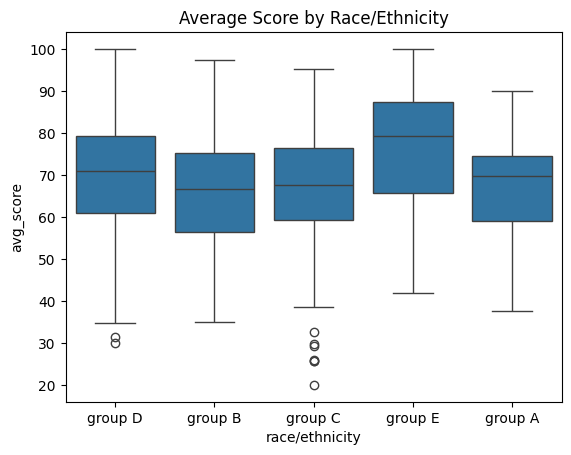

In [100]:
sns.boxplot(data=df, x="race/ethnicity", y="avg_score")
plt.title("Average Score by Race/Ethnicity")
plt.show()


In [101]:
numerical_columns_list

['math score', 'reading score', 'writing score']

In [103]:
df["avg_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

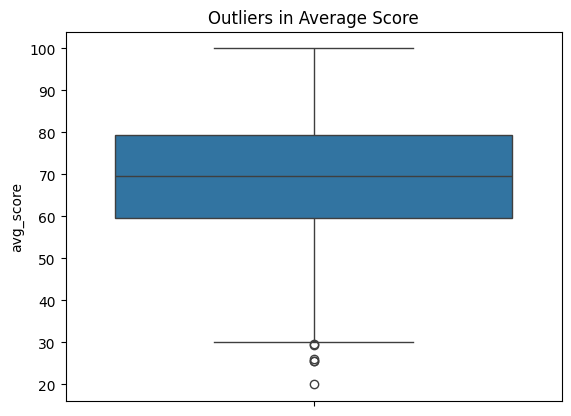

In [104]:
sns.boxplot(y=df["avg_score"])
plt.title("Outliers in Average Score")
plt.show()


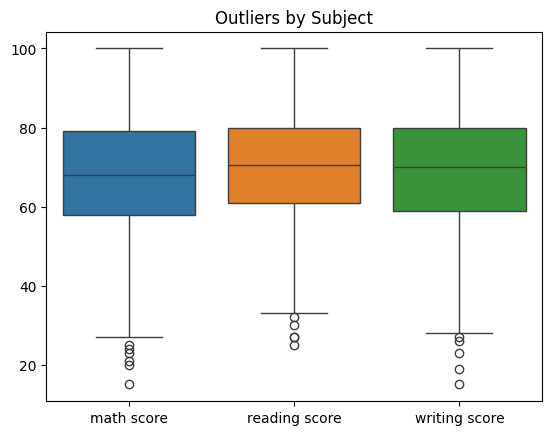

In [105]:
sns.boxplot(data=df[["math score","reading score","writing score"]])
plt.title("Outliers by Subject")
plt.show()


In [106]:
Q1 = df["avg_score"].quantile(0.25)
Q3 = df["avg_score"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [107]:
outliers = df[
    (df["avg_score"] < lower_bound) |
    (df["avg_score"] > upper_bound)
]


In [108]:
outliers.shape[0]


6

In [109]:
outliers[["math score","reading score","writing score","avg_score"]].head()


,math score,reading score,writing score,avg_score
72,23,33,33,29.666667
228,20,25,15,20.000000
376,31,27,19,25.666667
480,21,30,26,25.666667
513,28,32,28,29.333333
